In [1]:
import random
import math
import numpy as np
import copy
import getopt
import psycopg2
import sys
import time
import matplotlib.pyplot as plt

In [30]:
num_user = [10000, 100000, 1000000, 10000000, 100000000]


pdp_count_error = [0.11236321594907316, 0.03958026487058749, 0.012542406911779777, 0.003737172639089322, 0.000794447618521424]
pdp_count_sample_error = [0.06958612779235752, 0.01864893080938169, 0.0047412276540599275, 0.0014109460325749824, 0.0007563059269700479]
naive_count_error = [0.850712744632437, 0.26916775015303357, 0.12042231912754041, 0.02564546700197995, 0.010180309401919526]
sample_count_error = [0.16069442985943663, 0.1555240393750861, 0.15970125226797582, 0.15843184317980838, 0.15862847461004895]
em_count_error = [0.01, 0.0030399999999999997, 0.002438, 0.001754, 0.00131804]
count_result = [1000, 10000, 100000, 1000000, 10000000]

pdp_count_time = [0.0008000016212463378, 0.004187285900115967, 0.04126410484313965, 0.44817090034484863, 5.258951652050018]
naive_count_time = [8.463859558105468e-07, 5.066394805908203e-06, 2.157688140869141e-06,  1.1920928955078125e-06, 5.948543548583984e-06]
sample_count_time = [0.0006080865859985352, 0.003458237648010254, 0.03394085168838501, 0.32494559288024905, 3.45289945602417]
em_count_time = [0.009388160705566407, 0.05419740676879883, 0.5236204147338868, 5.150080966949463, 55.992506217956546]
pdp_count_sample_time = [0.0018970489501953125, 0.020053946971893312, 0.23221770524978638, 2.1699644446372988, 25.58126289844513]

pdp_count_error_uni = [0.5337213979341279, 0.13784938122915727, 0.05837349868020581, 0.018933253065501456, 0.007081847171790153]
pdp_count_sample_error_uni = [0.30231010370244166, 0.1156721716664617, 0.04137503209716153, 0.012433137555676512, 0.00395148155810535]

naive_count_error_uni = [0.5119999784414799, 0.30324441740695957, 0.09524769235018152, 0.04148857730929395, 0.015165752909588404]
sample_count_error_uni = [0.42567210222714774, 0.4172993948976541, 0.4199821093653537, 0.4191403081466345, 0.41949780862745756]
em_count_error_uni = [0.1345, 0.08215, 0.015335, 0.009465, 0.0057245]

pdp_count_time_uni = [0.0004590749740600586, 0.004633069038391113, 0.05408632755279541, 0.5561749935150146, 6.127076029777527]
naive_count_time_uni = [3.0994415283203125e-05, 2.0265579223632812e-06, 1.9073486328125e-06, 9.417533874511719e-06, 5.9604644775390625e-06]
sample_count_time_uni = [0.0005015134811401367, 0.0038080215454101562, 0.0413670539855957, 0.40220558643341064, 3.9583815336227417]
em_count_time_uni = [0.0058525800704956055, 0.05031585693359375, 0.5198251008987427, 5.1977540254592896, 57.455408573150635]
pdp_count_sample_time_uni = [0.002894878387451172, 0.027535557746887207, 0.3004124164581299, 2.835662364959717, 31.890988945961]



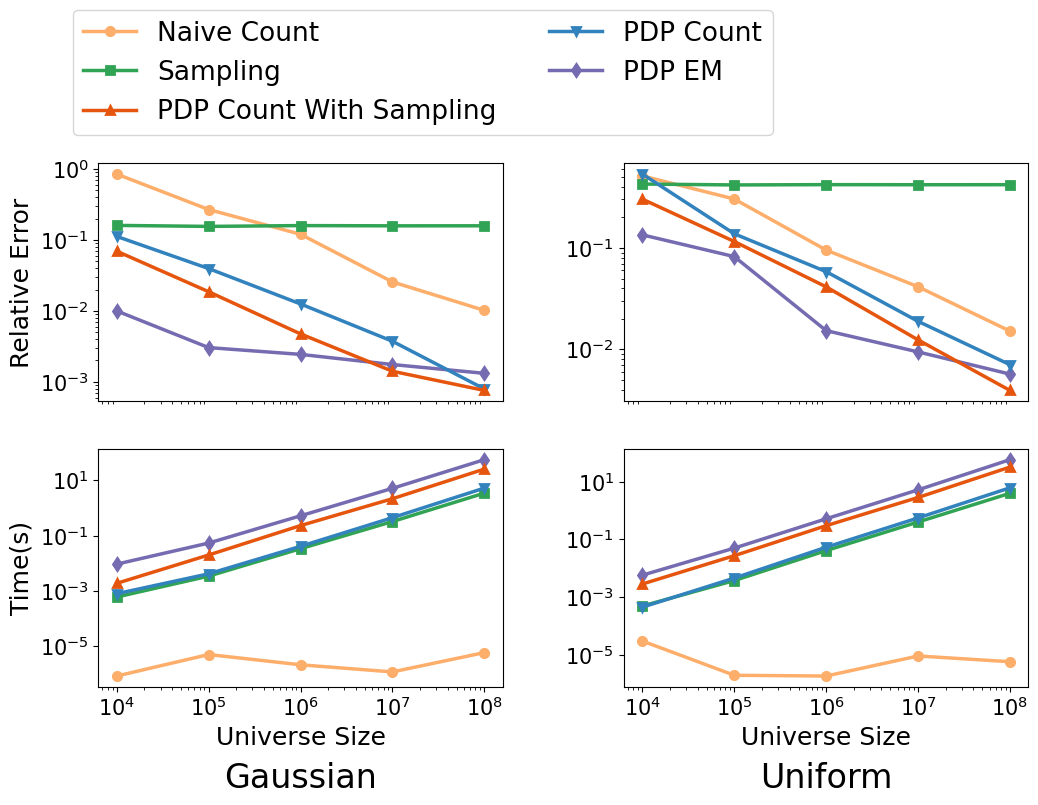

In [31]:
fig, axes = plt.subplots(2,2, figsize=(12, 6.8))

axes[0][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][0].plot(num_user, naive_count_error,linewidth = 2.5, linestyle = '-',label='Naive Count',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][0].plot(num_user, sample_count_error,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
line5, =axes[0][0].plot(num_user, em_count_error,linewidth = 2.5, linestyle = '-',label='PDP EM',
    marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
    markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line4, =axes[0][0].plot(num_user, pdp_count_error,linewidth = 2.5, linestyle = '-',label='PDP Count',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[0][0].plot(num_user, pdp_count_sample_error,linewidth = 2.5, linestyle = '-',label='PDP Count With Sampling',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0][0].set_xscale('log')

axes[0][0].set_ylabel('Relative Error',fontsize=18)
axes[0][0].set_yscale('log')
# axes[0].set_xscale('log')
axes[0][0].set_xticks([])

axes[0][0].legend(handles=[line1, line2, line3, line4, line5],bbox_to_anchor=(0.7, 0.7, 1, 1),fontsize=19,ncol=2, facecolor="white")


axes[1][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][0].plot(num_user, naive_count_time,linewidth = 2.5, linestyle = '-',label='Naive Count',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][0].plot(num_user, sample_count_time,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
line5, =axes[1][0].plot(num_user, em_count_time,linewidth = 2.5, linestyle = '-',label='PDP EM',
    marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
    markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line4, =axes[1][0].plot(num_user, pdp_count_time,linewidth = 2.5, linestyle = '-',label='PDP Count',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[1][0].plot(num_user, pdp_count_sample_time,linewidth = 2.5, linestyle = '-',label='PDP Count With Sampling',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))


#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_ylabel('Time(s)',fontsize=18)




axes[0][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][1].plot(num_user, naive_count_error_uni,linewidth = 2.5, linestyle = '-',label='Naive Count',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][1].plot(num_user, sample_count_error_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
line5, =axes[0][1].plot(num_user, em_count_error_uni,linewidth = 2.5, linestyle = '-',label='PDP EM',
    marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
    markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line4, =axes[0][1].plot(num_user, pdp_count_error_uni,linewidth = 2.5, linestyle = '-',label='PDP Count',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[0][1].plot(num_user, pdp_count_sample_error_uni,linewidth = 2.5, linestyle = '-',label='PDP Count With Sampling',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0][1].set_xscale('log')

# axes[0][1].set_ylabel('Relative Error',fontsize=18)
axes[0][1].set_yscale('log')
# axes[0].set_xscale('log')
axes[0][1].set_xticks([])

axes[1][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][1].plot(num_user, naive_count_time_uni,linewidth = 2.5, linestyle = '-',label='Naive Count',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][1].plot(num_user, sample_count_time_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
line5, =axes[1][1].plot(num_user, em_count_time_uni,linewidth = 2.5, linestyle = '-',label='PDP EM',
    marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
    markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line4, =axes[1][1].plot(num_user, pdp_count_time_uni,linewidth = 2.5, linestyle = '-',label='PDP Count',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[1][1].plot(num_user, pdp_count_sample_time_uni,linewidth = 2.5, linestyle = '-',label='PDP Count With Sampling',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))


#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
# axes[1][1].set_ylabel('Time(s)',fontsize=18)

axes[1][0].set_xlabel('Universe Size', fontsize=18)
axes[1][1].set_xlabel('Universe Size', fontsize=18)


plt.subplots_adjust( wspace=0.3)
axes[1][0].set_title('Gaussian', y=-0.46, fontsize=24)
axes[1][1].set_title('Uniform', y=-0.46, fontsize=24)

# plt.show()
plt.savefig("./count.jpg", bbox_inches='tight')


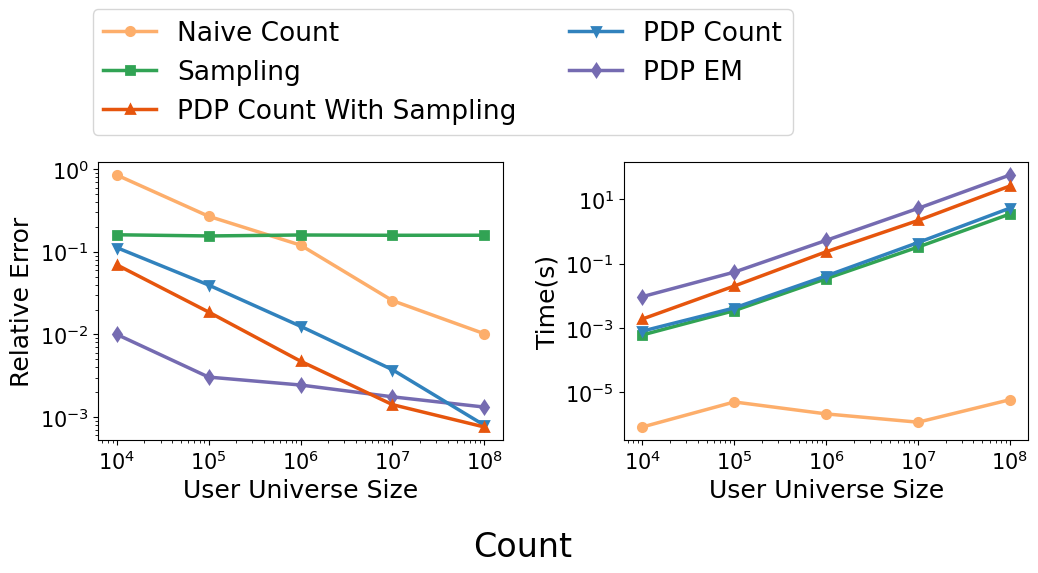

In [103]:
fig, axes = plt.subplots(1,2, figsize=(12, 3.6))

axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(num_user, naive_count_error,linewidth = 2.5, linestyle = '-',label='Naive Count',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0].plot(num_user, sample_count_error,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
line5, =axes[0].plot(num_user, em_count_error,linewidth = 2.5, linestyle = '-',label='PDP EM',
    marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
    markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line4, =axes[0].plot(num_user, pdp_count_error,linewidth = 2.5, linestyle = '-',label='PDP Count',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[0].plot(num_user, pdp_count_sample_error,linewidth = 2.5, linestyle = '-',label='PDP Count With Sampling',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0].set_ylabel('Relative Error',fontsize=18)
axes[0].set_yscale('log')
axes[0].set_xscale('log')


axes[0].legend(handles=[line1, line2, line3, line4, line5],bbox_to_anchor=(0.75, 0.6, 1, 1),fontsize=19,ncol=2, facecolor="white")


axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(num_user, naive_count_time,linewidth = 2.5, linestyle = '-',label='Naive Count',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1].plot(num_user, sample_count_time,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
line5, =axes[1].plot(num_user, em_count_time,linewidth = 2.5, linestyle = '-',label='PDP EM',
    marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
    markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line4, =axes[1].plot(num_user, pdp_count_time,linewidth = 2.5, linestyle = '-',label='PDP Count',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[1].plot(num_user, pdp_count_sample_time,linewidth = 2.5, linestyle = '-',label='PDP Count With Sampling',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))


#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_ylabel('Time(s)',fontsize=18)

axes[0].set_xlabel('User Universe Size', fontsize=18)
axes[1].set_xlabel('User Universe Size', fontsize=18)
plt.subplots_adjust( wspace=0.3)
plt.title("Count", fontsize=24, x=-0.25,y=-0.45)

# axes[0].set_title('Error', y=-0.4, fontsize=22)
# axes[1].set_title('Time', y=-0.4, fontsize=22)

# plt.show()
plt.savefig("./count.jpg", bbox_inches='tight')

In [31]:
pdp_sum_error = [0.3157073245243079, 0.05812358125736117, 0.010989464476715945, 0.003599194858584145, 0.0028856314550655547]
naive_sum_error = [1.0, 1.0, 1.0, 1.0, 0.47293791316885936]
sample_sum_error = [0.14592838864356394, 0.15903790196017076, 0.15915198617400186, 0.15896918238867888, 0.15873650365244776]
extend_count_error = [0.9935868538602662, 0.079744392901848895, 0.06680014903690414, 0.05877856347925791, 0.046169608752516224]
# sum_result = [1000, 10000, 100000, 1000000, 10000000]

pdp_sum_time = [0.0183929443359375, 0.18881635665893554, 2.009256601333618, 21.171864414215086, 229.88819255828858]
naive_sum_time = [0.0018088817596435547, 0.015865087509155273, 0.08132696151733398, 0.7928168773651123, 71.92613759040833]
sample_sum_time = [0.021792888641357422, 0.10486602783203125, 0.986260175704956, 9.737133979797363, 98.55920314788818]
extend_count_time = [0.02367091178894043, 0.36224074363708497, 7.181973218917847, 95.31473846435547, 1257.2792988300323]


pdp_sum_error_uni = [0.4320567900221662, 0.21385728635842371, 0.05369869557569353, 0.022988191445489248, 0.0076175557169209495]
naive_sum_error_uni = [1.0, 1.0, 1.0, 1.0, 0.48134987920522776]
sample_sum_error_uni = [0.47087209428505533, 0.4579396364230934, 0.4569491852471302, 0.45882475322380223, 0.4591011964144775]
# extend_count_error = [0.9935868538602662, 0.079744392901848895, 0.06680014903690414, 0.05877856347925791, 0.046169608752516224]
# sum_result = [1000, 10000, 100000, 1000000, 10000000]

pdp_sum_time_uni = [0.0157320499420166, 0.17197322845458984, 1.7712149620056152, 17.39752197265625, 193.17139077186584]
naive_sum_time_uni = [0.0020270347595214844, 0.013613224029541016, 0.06986117362976074, 0.7050633430480957, 74.5263729095459]
sample_sum_time_uni = [0.014801025390625, 0.09353089332580566, 0.8449320793151855, 8.400296211242676, 84.66456818580627]
# extend_count_time = [0.02367091178894043, 0.36224074363708497, 7.181973218917847, 95.31473846435547, 1257.2792988300323]


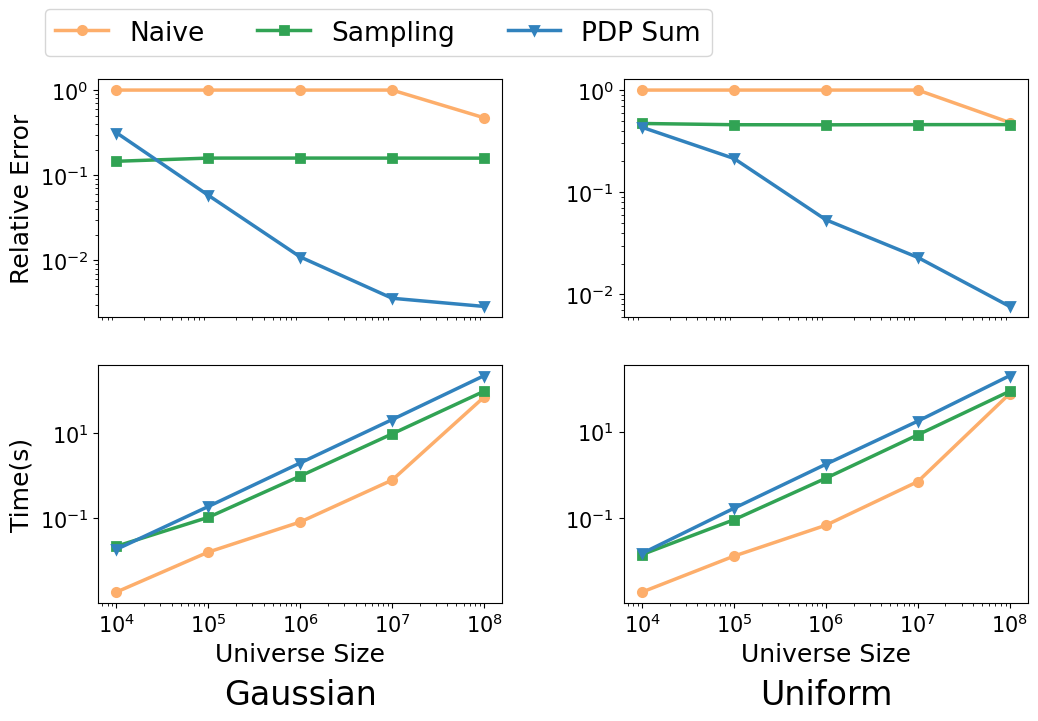

In [32]:
fig, axes = plt.subplots(2,2, figsize=(12, 6.8))

axes[0][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][0].plot(num_user, naive_sum_error,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][0].plot(num_user, sample_sum_error,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[0][0].plot(num_user, pdp_sum_error,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


axes[0][0].set_xscale('log')

axes[0][0].set_ylabel('Relative Error',fontsize=18)
axes[0][0].set_yscale('log')
# axes[0].set_xscale('log')
axes[0][0].set_xticks([])

axes[0][0].legend(handles=[line1, line2, line3],bbox_to_anchor=(0.55, 0.35, 1, 1),fontsize=19,ncol=3, facecolor="white")


axes[1][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][0].plot(num_user, naive_sum_time,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][0].plot(num_user, sample_sum_time,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line3, =axes[1].plot(num_user, em_count_time,linewidth = 2.5, linestyle = '-',label='PDP EM',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line3, =axes[1][0].plot(num_user, pdp_sum_time,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_ylabel('Time(s)',fontsize=18)




axes[0][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][1].plot(num_user, naive_sum_error_uni,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][1].plot(num_user, sample_sum_error_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[0][1].plot(num_user, pdp_sum_error_uni,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))



axes[0][1].set_xscale('log')

# axes[0][1].set_ylabel('Relative Error',fontsize=18)
axes[0][1].set_yscale('log')
# axes[0].set_xscale('log')
axes[0][1].set_xticks([])

axes[1][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][1].plot(num_user, naive_sum_time_uni,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][1].plot(num_user, sample_sum_time_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[1][1].plot(num_user, pdp_sum_time_uni,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))

#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
# axes[1][1].set_ylabel('Time(s)',fontsize=18)

axes[1][0].set_xlabel('Universe Size', fontsize=18)
axes[1][1].set_xlabel('Universe Size', fontsize=18)


plt.subplots_adjust( wspace=0.3)
axes[1][0].set_title('Gaussian', y=-0.46, fontsize=24)
axes[1][1].set_title('Uniform', y=-0.46, fontsize=24)

# plt.show()
plt.savefig("./sum.jpg", bbox_inches='tight')


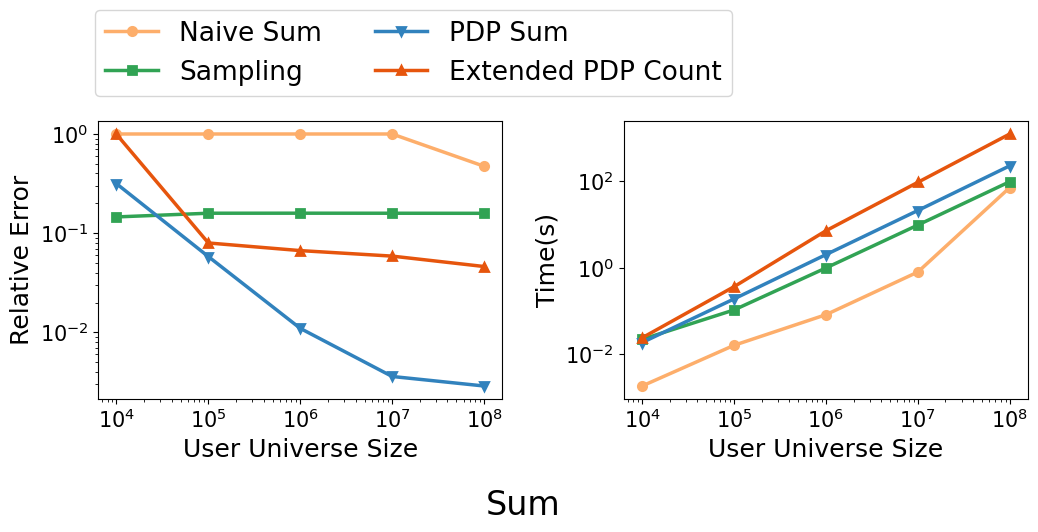

In [104]:
fig, axes = plt.subplots(1,2, figsize=(12, 3.6))

axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(num_user, naive_sum_error,linewidth = 2.5, linestyle = '-',label='Naive Sum',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0].plot(num_user, sample_sum_error,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line3, =axes[0].plot(num_user, em_count_error,linewidth = 2.5, linestyle = '-',label='PDP EM',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line3, =axes[0].plot(num_user, pdp_sum_error,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line4, =axes[0].plot(num_user, extend_count_error,linewidth = 2.5, linestyle = '-',label='Extended PDP Count',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0].set_ylabel('Relative Error',fontsize=18)
axes[0].set_yscale('log')
axes[0].set_xscale('log')

axes[0].legend(handles=[line1, line2, line3, line4],bbox_to_anchor=(0.6, 0.45, 1, 1),fontsize=19,ncol=2, facecolor="white")


axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(num_user, naive_sum_time,linewidth = 2.5, linestyle = '-',label='Naive Sum',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1].plot(num_user, sample_sum_time,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line3, =axes[1].plot(num_user, em_count_time,linewidth = 2.5, linestyle = '-',label='PDP EM',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line3, =axes[1].plot(num_user, pdp_sum_time,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line4, =axes[1].plot(num_user, extend_count_time,linewidth = 2.5, linestyle = '-',label='Extended PDP Count',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))


#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_ylabel('Time(s)',fontsize=18)

axes[0].set_xlabel('User Universe Size', fontsize=18)
axes[1].set_xlabel('User Universe Size', fontsize=18)
plt.subplots_adjust( wspace=0.3)
plt.title("Sum", fontsize=24, x=-0.25,y=-0.45)

# axes[0].set_title('Error', y=-0.4, fontsize=22)
# axes[1].set_title('Time', y=-0.4, fontsize=22)

# plt.show()
plt.savefig("./sum.jpg", bbox_inches='tight')

In [39]:
Q_7_error = [0.010700567455295263]
Q_7_time = [2557.2037739753723]

In [9]:
scale = ["0.125", "0.25", "0.5", "1","2","4"]
pdp_Q5_error = [0.2610936431858793, 0.1794539941399322, 0.09949107226757639, 0.05528634108333106,0.03507681707855399, 0.021701931671039558]
naive_Q5_error = [1,1,1,1,1,1]
sample_Q5_error = [0.4041377456441058, 0.3535557548934988, 0.33787756208961595, 0.3025789403548871, 0.29581768315453366, 0.3025743234549003]

pdp_Q5_time = [2.4087533473968508, 5.611119663715362, 13.274375319480896, 27.31866581439972, 61.906107008457184, 136.36346565485002]
naive_Q5_time = [2.106385350227356, 4.688563966751099,11.31188189983368, 30.48272885084152, 89.4012113419719, 151.25961735248566]
sample_Q5_time = [2.206061005592346, 4.948184251785278, 11.407658302783966, 30.17083728313446,65.48401262760163, 145.69111661911012]

pdp_Q7_error = [0.23560910096576984, 0.1430140682624331, 0.09131297981336177, 0.05769733673093802, 0.029671184792200028, 0.01908436757299683]
naive_Q7_error = [1,1,1,1,1,0.9920807077608822]
sample_Q7_error = [0.38074935004431026, 0.35757862153951203, 0.3199887874308776, 0.3038528202901851, 0.2984341825170101, 0.2958559987564082]

pdp_Q7_time = [120.85484330654144, 253.0319656252861, 601.1491300463676, 1324.6831632256508, 2851.2082531571386, 6050.597428011894]
naive_Q7_time = [104.37480956315994, 218.00460095405577,484.26499844789504, 1108.9724080085755, 2317.2138179183007, 5099.648040759564]
sample_Q7_time = [93.67725616693497, 203.69849082231522, 517.0276905655861, 1043.3667468070985, 2178.473593711853, 4251.234576332569]


pdp_Q5_error_uni = [0.7670687192453, 0.5673682159088536, 0.3234907650128471, 0.2686857480229936,0.2046197170870634, 0.15652472954930433]
naive_Q5_error_uni = [1,1,1,1,1,1]
sample_Q5_error_uni = [0.9388501827921572, 0.9379051701361852, 0.8764420325323558, 0.8738094234217095, 0.8721571667342114, 0.8347773783436138]

pdp_Q5_time_uni = [1.7655086755752563, 4.320547676086425, 11.901322817802429, 31.398694336414337, 69.70561331510544, 152.6393015742302]
naive_Q5_time_uni = [2.5069273948669433, 5.830604791641235,14.151477468013763, 35.65414915084839, 78.301231777668, 161.4487149119377]
sample_Q5_time_uni = [2.0682927489280702, 4.538835179805756, 12.707658302783966, 32.87083728313446, 71.81053401231766, 150.82719014883043]

pdp_Q7_error_uni = [0.646208215190953, 0.5483940496806897, 0.3825832448724369, 0.2653956130837294, 0.19535234510903393, 0.1398310709824932]
naive_Q7_error_uni = [1,1,1,1,1,1]
sample_Q7_error_uni = [0.9218367904895446, 0.885437280063526, 0.8632521638150885, 0.8572691405950685, 0.8440316869498888, 0.848351944677753]

pdp_Q7_time_uni = [133.16461127996445, 281.7626382112503, 553.4461300436761, 1222.0780094504357, 2733.1844272375106, 6167.815979099274]
naive_Q7_time_uni = [113.85145552158356, 245.22109829187394,542.6076308846474, 1258.18899217844, 2873.515617620945, 6037.133749842644]
sample_Q7_time_uni = [93.90626802444459, 193.6826627612114, 407.46076729297636, 941.9728319168091, 1872.0450206041337, 3761.5393029808997]


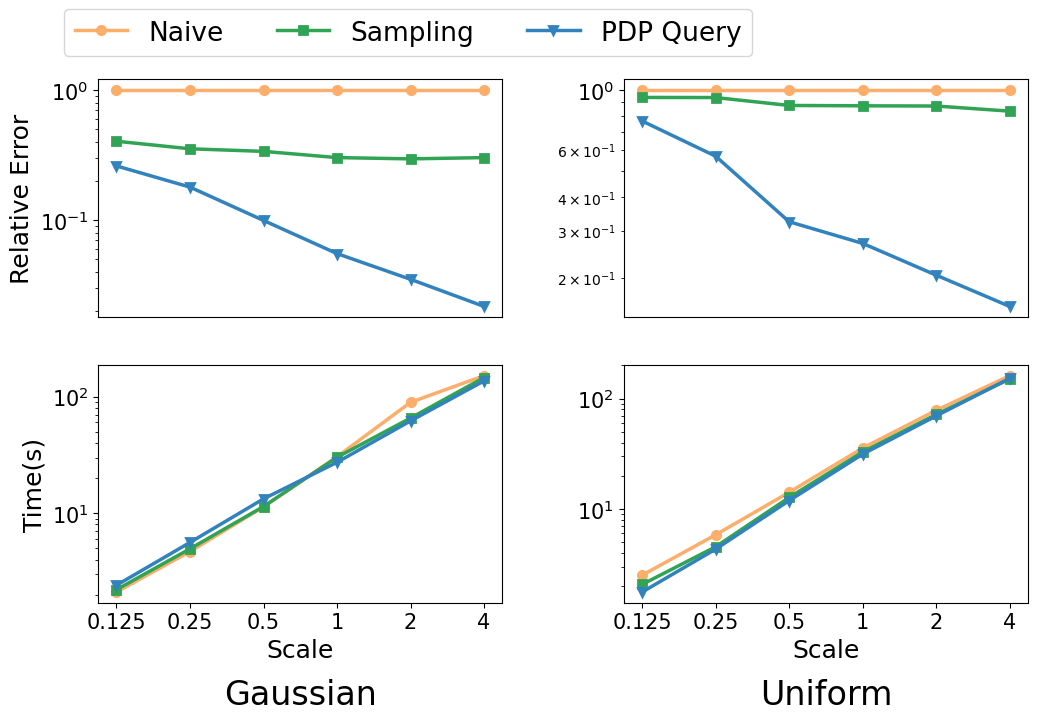

In [26]:
fig, axes = plt.subplots(2,2, figsize=(12, 6.8))

axes[0][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][0].plot(scale, naive_Q5_error,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][0].plot(scale, sample_Q5_error,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[0][0].plot(scale, pdp_Q5_error,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0][0].set_ylabel('Relative Error',fontsize=18)
axes[0][0].set_yscale('log')
# axes[0].set_xscale('log')
axes[0][0].set_xticks([])

axes[0][0].legend(handles=[line1, line2, line3],bbox_to_anchor=(0.65, 0.35, 1, 1),fontsize=19,ncol=3, facecolor="white")


axes[1][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][0].plot(scale, naive_Q5_time,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][0].plot(scale, sample_Q5_time,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[1][0].plot(scale, pdp_Q5_time,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))



#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][0].set_yscale('log')
# axes[1].set_xscale('log')
axes[1][0].set_ylabel('Time(s)',fontsize=18)




axes[0][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][1].plot(scale, naive_Q5_error_uni,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][1].plot(scale, sample_Q5_error_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[0][1].plot(scale, pdp_Q5_error_uni,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



# axes[0][1].set_ylabel('Relative Error',fontsize=18)
axes[0][1].set_yscale('log')
axes[0][1].set_xticks([])

# axes[0].set_xscale('log')

# axes[0].legend(handles=[line1, line2, line3],bbox_to_anchor=(0.25, 0.45, 1, 1),fontsize=19,ncol=2, facecolor="white")


axes[1][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][1].plot(scale, naive_Q5_time_uni,linewidth = 2.5, linestyle = '-',label='Naive ',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][1].plot(scale, sample_Q5_time_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[1][1].plot(scale, pdp_Q5_time_uni,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))



#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][1].set_yscale('log')
# axes[1].set_xscale('log')
# axes[1][1].set_ylabel('Time(s)',fontsize=18)

axes[1][0].set_xlabel('Scale', fontsize=18)
axes[1][1].set_xlabel('Scale', fontsize=18)


plt.subplots_adjust( wspace=0.3)
axes[1][0].set_title('Gaussian', y=-0.46, fontsize=24)
axes[1][1].set_title('Uniform', y=-0.46, fontsize=24)

# plt.show()
plt.savefig("./pdpQ5.jpg", bbox_inches='tight')


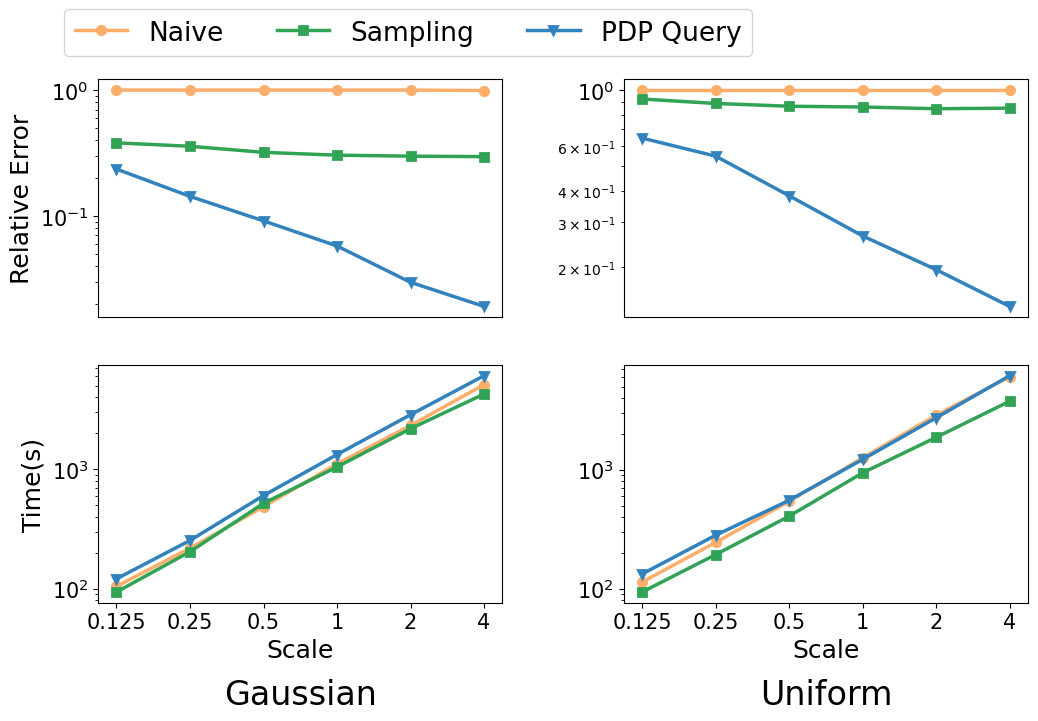

In [25]:
fig, axes = plt.subplots(2,2, figsize=(12, 6.8))

axes[0][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][0].plot(scale, naive_Q7_error,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][0].plot(scale, sample_Q7_error,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[0][0].plot(scale, pdp_Q7_error,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0][0].set_ylabel('Relative Error',fontsize=18)
axes[0][0].set_yscale('log')
# axes[0].set_xscale('log')
axes[0][0].set_xticks([])

axes[0][0].legend(handles=[line1, line2, line3],bbox_to_anchor=(0.65, 0.35, 1, 1),fontsize=19,ncol=3, facecolor="white")


axes[1][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][0].plot(scale, naive_Q7_time,linewidth = 2.5, linestyle = '-',label='Naive ',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][0].plot(scale, sample_Q7_time,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[1][0].plot(scale, pdp_Q7_time,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))



#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][0].set_yscale('log')
# axes[1].set_xscale('log')
axes[1][0].set_ylabel('Time(s)',fontsize=18)




axes[0][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][1].plot(scale, naive_Q7_error_uni,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][1].plot(scale, sample_Q7_error_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[0][1].plot(scale, pdp_Q7_error_uni,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



# axes[0][1].set_ylabel('Relative Error',fontsize=18)
axes[0][1].set_yscale('log')
axes[0][1].set_xticks([])

# axes[0].set_xscale('log')

# axes[0].legend(handles=[line1, line2, line3],bbox_to_anchor=(0.25, 0.45, 1, 1),fontsize=19,ncol=2, facecolor="white")


axes[1][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][1].plot(scale, naive_Q7_time_uni,linewidth = 2.5, linestyle = '-',label='Naive ',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][1].plot(scale, sample_Q7_time_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[1][1].plot(scale, pdp_Q7_time_uni,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))



#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][1].set_yscale('log')
# axes[1].set_xscale('log')
# axes[1][1].set_ylabel('Time(s)',fontsize=18)

axes[1][0].set_xlabel('Scale', fontsize=18)
axes[1][1].set_xlabel('Scale', fontsize=18)


plt.subplots_adjust( wspace=0.3)
axes[1][0].set_title('Gaussian', y=-0.46, fontsize=24)
axes[1][1].set_title('Uniform', y=-0.46, fontsize=24)

# plt.show()
plt.savefig("./pdpQ7.jpg", bbox_inches='tight')


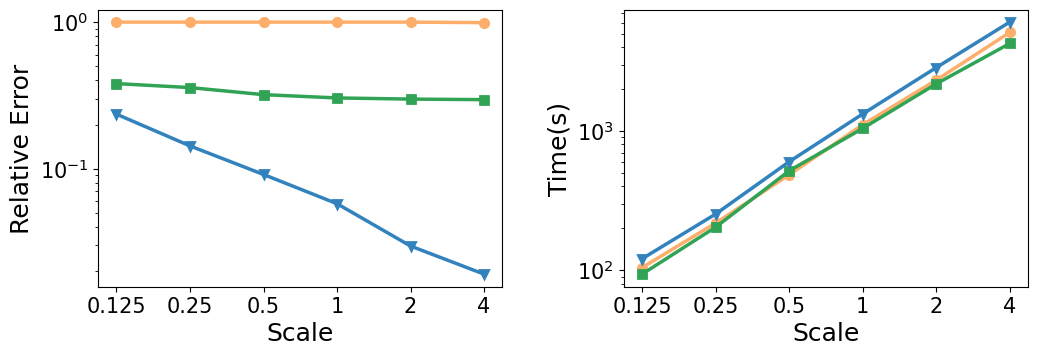

In [61]:
fig, axes = plt.subplots(1,2, figsize=(12, 3.6))

axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(scale, naive_Q7_error,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0].plot(scale, sample_Q7_error,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[0].plot(scale, pdp_Q7_error,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0].set_ylabel('Relative Error',fontsize=18)
axes[0].set_yscale('log')
# axes[0].set_xscale('log')

# axes[0].legend(handles=[line1, line2, line3],bbox_to_anchor=(0.25, 0.45, 1, 1),fontsize=19,ncol=2, facecolor="white")


axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(scale, naive_Q7_time,linewidth = 2.5, linestyle = '-',label='Naive ',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1].plot(scale, sample_Q7_time,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[1].plot(scale, pdp_Q7_time,linewidth = 2.5, linestyle = '-',label='PDP Query',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))



#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1].set_yscale('log')
# axes[1].set_xscale('log')
axes[1].set_ylabel('Time(s)',fontsize=18)

axes[0].set_xlabel('Scale', fontsize=18)
axes[1].set_xlabel('Scale', fontsize=18)
plt.subplots_adjust( wspace=0.3)

# axes[0].set_title('Error', y=-0.4, fontsize=22)
# axes[1].set_title('Time', y=-0.4, fontsize=22)

# plt.show()
plt.savefig("./pdp_Q7.pdf", bbox_inches='tight')


In [7]:
##graph for B

B = [100000, 1000000, 10000000, 100000000, 1000000000]


pdp_sum_error = [0.007546395624141574, 0.007118823692756248, 0.011967915501215504, 0.012412358812447554, 0.015355927179844199]
naive_sum_error = [1.0, 1.0, 1.0, 1.0, 1.0]
sample_sum_error = [0.21791644256669512, 0.21585237081540357, 0.21465531701187107, 0.21612767988491435, 0.21546549388695346]
extend_count_error = [0.9935868538602662, 0.079744392901848895, 0.06680014903690414, 0.05877856347925791, 0.046169608752516224]
# sum_result = [1000, 10000, 100000, 1000000, 10000000]

pdp_sum_time = [1.619095802307129, 1.7417752742767334, 1.9027588367462158, 2.1021900177001953, 2.268900156021118]
naive_sum_time = [0.07064690589904785, 0.07087011337280273, 0.07003519535064698, 0.07825651168823242, 0.07082560062408447]
sample_sum_time = [0.8410291194915771, 0.8292958021163941, 0.8301316022872924, 0.829810905456543, 0.8313210725784301]
extend_count_time = [0.02367091178894043, 0.36224074363708497, 7.181973218917847, 95.31473846435547, 1257.2792988300323]


pdp_sum_error_uni = [0.06460317676790908, 0.0669660914480962, 0.07030446687274154, 0.07518686122249925, 0.0736260481535383]
naive_sum_error_uni = [1.0, 1.0, 1.0, 1.0, 1.0]
sample_sum_error_uni = [0.4599156136864222, 0.46054576113681667, 0.458562727769771, 0.45814733432901755, 0.45946136086094425]
# extend_count_error = [0.9935868538602662, 0.079744392901848895, 0.06680014903690414, 0.05877856347925791, 0.046169608752516224]
# sum_result = [1000, 10000, 100000, 1000000, 10000000]

pdp_sum_time_uni = [1.581805944442749, 1.7114348411560059, 1.8598589897155762, 2.0289878845214844, 2.2211151123046875]
naive_sum_time_uni = [0.0674741268157959, 0.07428383827209473, 0.06868100166320801, 0.07039022445678711, 0.06873202323913574]

sample_sum_time_uni = [0.8452510833740234, 0.8523690700531006, 0.8325042724609375, 0.8498959541320801, 0.8380510807037354]
# extend_count_time = [0.02367091178894043, 0.36224074363708497, 7.181973218917847, 95.31473846435547, 1257.2792988300323]



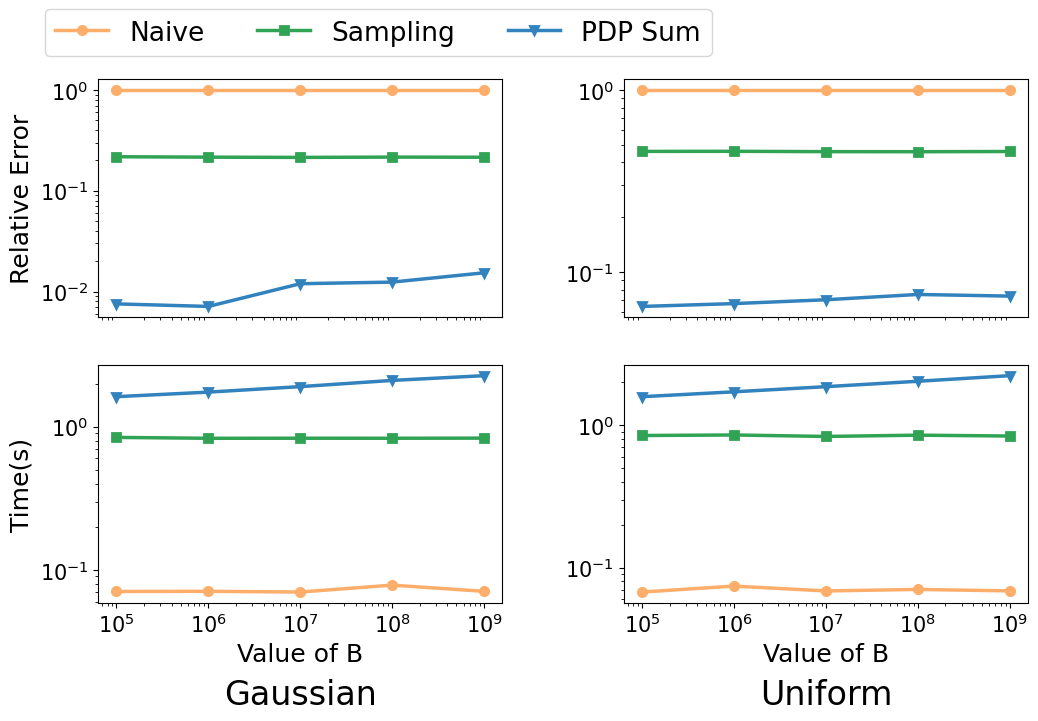

In [30]:
fig, axes = plt.subplots(2,2, figsize=(12, 6.8))

axes[0][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][0].plot(B, naive_sum_error,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][0].plot(B, sample_sum_error,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[0][0].plot(B, pdp_sum_error,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


axes[0][0].set_xscale('log')

axes[0][0].set_ylabel('Relative Error',fontsize=18)
axes[0][0].set_yscale('log')
# axes[0].set_xscale('log')
axes[0][0].set_xticks([])

axes[0][0].legend(handles=[line1, line2, line3],bbox_to_anchor=(0.55, 0.35, 1, 1),fontsize=19,ncol=3, facecolor="white")


axes[1][0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][0].plot(B, naive_sum_time,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][0].plot(B, sample_sum_time,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line3, =axes[1].plot(num_user, em_count_time,linewidth = 2.5, linestyle = '-',label='PDP EM',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line3, =axes[1][0].plot(B, pdp_sum_time,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_ylabel('Time(s)',fontsize=18)




axes[0][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0][1].plot(B, naive_sum_error_uni,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[0][1].plot(B, sample_sum_error_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[0][1].plot(B, pdp_sum_error_uni,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))



axes[0][1].set_xscale('log')

# axes[0][1].set_ylabel('Relative Error',fontsize=18)
axes[0][1].set_yscale('log')
# axes[0].set_xscale('log')
axes[0][1].set_xticks([])

axes[1][1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1][1].plot(B, naive_sum_time_uni,linewidth = 2.5, linestyle = '-',label='Naive',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

line2, =axes[1][1].plot(B, sample_sum_time_uni,linewidth = 2.5, linestyle = '-',label='Sampling',
    marker = 's',markersize = 6,color=plt.cm.tab20c(8),
    markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))

line3, =axes[1][1].plot(B, pdp_sum_time_uni,linewidth = 2.5, linestyle = '-',label='PDP Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))

#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
# axes[1][1].set_ylabel('Time(s)',fontsize=18)

axes[1][0].set_xlabel('Value of B', fontsize=18)
axes[1][1].set_xlabel('Value of B', fontsize=18)


plt.subplots_adjust( wspace=0.3)
axes[1][0].set_title('Gaussian', y=-0.46, fontsize=24)
axes[1][1].set_title('Uniform', y=-0.46, fontsize=24)

# plt.show()
plt.savefig("./sum_B.jpg", bbox_inches='tight')
